In [6]:
#Apostolos Kasselouris, A.M: 2994
#Dimitrios Bakalis, A.M: 3033

#Data Analysis for covid-19 based on:
#1)Owid: https://github.com/owid/covid-19-data/tree/master/public/data
#2)CDC:  https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days

import pandas as pd 

from pandas import Series, DataFrame
from datetime import datetime 

import matplotlib.pyplot as plt
import matplotlib.pyplot as gridspec
%matplotlib inline

import seaborn as sns
import numpy as np
from numpy import median

import scipy as sp
from scipy import stats 
from scipy.stats import kendalltau, pearsonr, spearmanr
from scipy.stats import ttest_ind

df = pd.read_csv('owid-covid-data.csv')

In [7]:
#We will work the dataframe only for the date "1-11-2020" on questions a) and b)

df_date = df.loc[df['date'] == "2020-11-01"]

df_col = df_date['total_deaths_per_million']/df_date['total_cases_per_million']
df_col = df_col[df_col.between(df_col.quantile(.0), df_col.quantile(.95))]   #deletes the upper end outlier of mortality_rate_per_million
df_date.insert(0, 'mortality_rate_per_million', df_col)

df_log = np.log(df_date['population_density'])  
df_date.insert(0, 'population_density_log', df_log)


df_col = (df['new_deaths']/df['new_cases'])  # new column for question C)
df.insert(0, 'mortality_rate', df_col)

In [8]:
# A) 

def scatter_plots(df):

    fig = plt.figure(figsize=(27,17))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)

    key_list = ["total_cases_per_million","total_deaths_per_million","mortality_rate_per_million"]
    attributes_list = ["gdp_per_capita","hospital_beds_per_thousand","population_density","population_density_log"]

    flag = 0
    for key in key_list:
        for attribute in attributes_list:
            flag+=1
            ax = fig.add_subplot(3, 4, flag)
            sns.scatterplot(x = key, y = attribute, hue = "continent", data = df, ax = ax)
            plt.grid()

    plt.show()
    

In [9]:
#Pearson Correlation Coefficient

def pearson_correlation_coefficient(df):

    pc1 = df[['total_cases_per_million', 'total_deaths_per_million', 'mortality_rate_per_million', 'gdp_per_capita', 'hospital_beds_per_thousand', 'population_density','population_density_log']]
    pearsoncorr = pc1.corr(method='pearson')
    pearsoncorr = pearsoncorr[['gdp_per_capita', 'hospital_beds_per_thousand', 'population_density','population_density_log']]
    pearsoncorr = pearsoncorr.drop(['gdp_per_capita', 'hospital_beds_per_thousand', 'population_density','population_density_log'])

    return pearsoncorr
    

In [10]:
#p-value

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def p_value(df):
    pc1 = df[['total_cases_per_million', 'total_deaths_per_million', 'mortality_rate_per_million', 'gdp_per_capita', 'hospital_beds_per_thousand', 'population_density','population_density_log']]
    pc1 = pc1.dropna()
    pValue = pc1.corr(method=pearsonr_pval)
    pValue = pValue[['gdp_per_capita', 'hospital_beds_per_thousand', 'population_density','population_density_log']]
    pValue = pValue.drop(['gdp_per_capita', 'hospital_beds_per_thousand', 'population_density','population_density_log'])

    return pValue
    

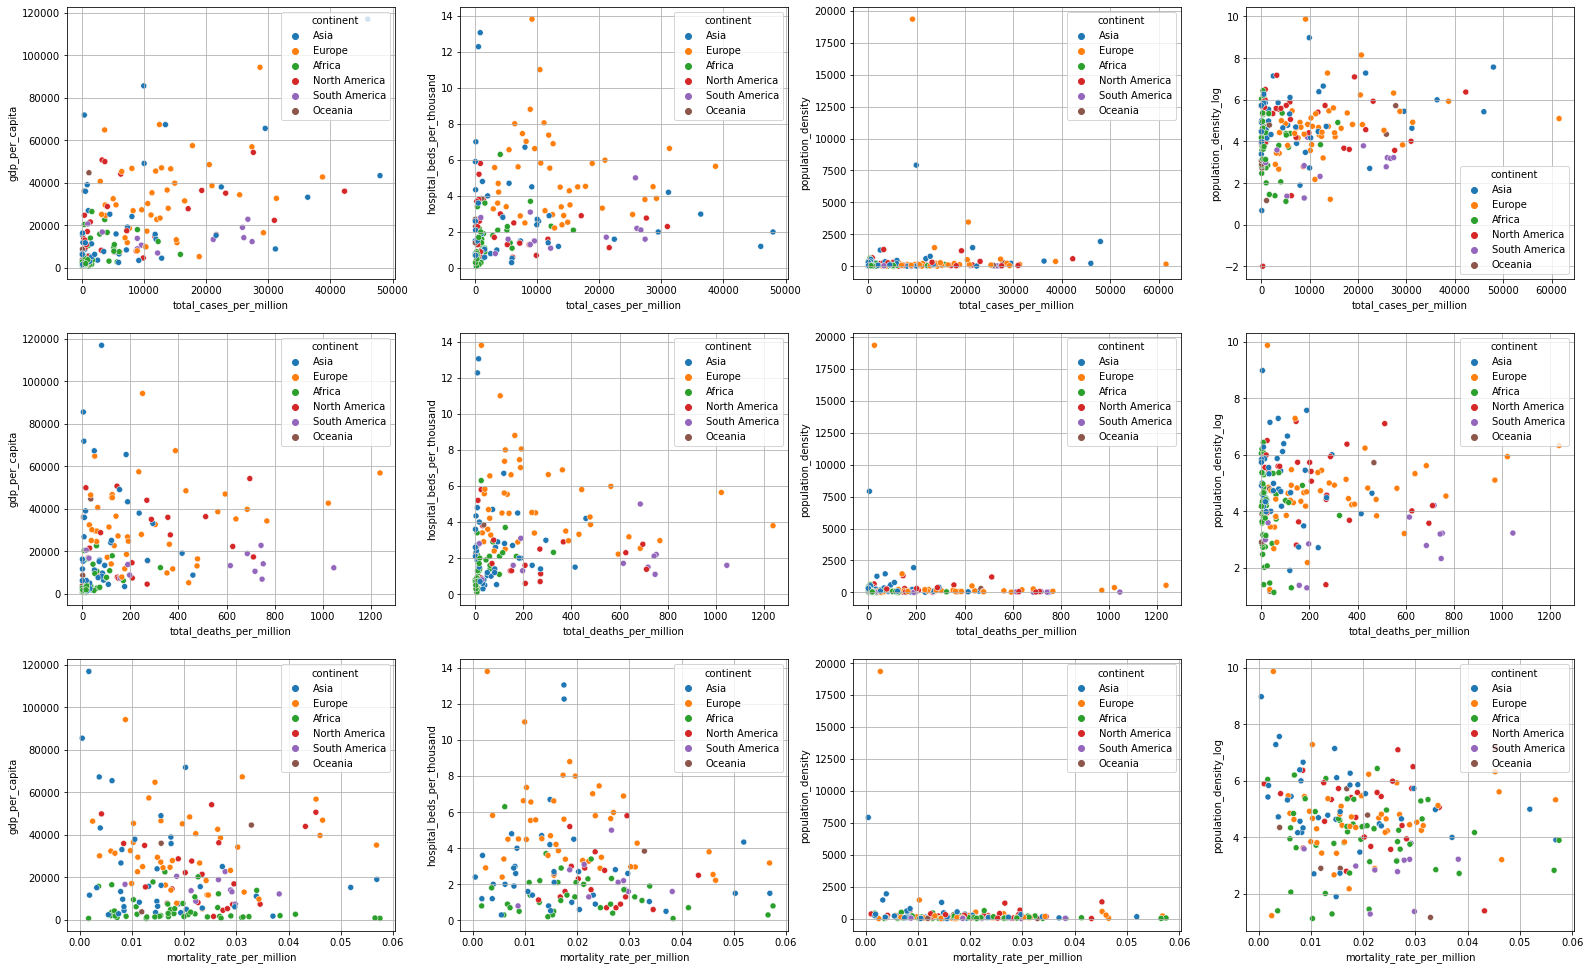

In [11]:
#Scatter plots for all continents
scatter_plots(df_date)


In [12]:
#Pearson Correlation Coefficient for all continents
pearson_correlation_coefficient(df_date)


,gdp_per_capita,hospital_beds_per_thousand,population_density,population_density_log
total_cases_per_million,0.515979,0.142381,0.062125,0.198018
total_deaths_per_million,0.254143,0.058657,-0.058396,0.011638
mortality_rate_per_million,-0.118914,-0.173997,-0.163921,-0.159237


In [13]:
#P-values for all continents
#Groups with p-value under 0.05 are statistical significant
p_value(df_date)


,gdp_per_capita,hospital_beds_per_thousand,population_density,population_density_log
total_cases_per_million,5.687095e-10,0.098653,0.343706,0.148813
total_deaths_per_million,3.934660e-03,0.201868,0.470843,0.900182
mortality_rate_per_million,7.432803e-02,0.113378,0.032305,0.114080


One important thing we should mention is how the population density is way better represented in log scale because of the two outliers from Europe and Asia.

Also, we could assume that based on scatter plots, pearson correlation coefficients and p-values on 1-11-2020(D/M/Y) there is a slight negative correlation(contrast) between population_density and mortality_rate_per_million but that wouldn't be exactly true because population density is better represented in log scale.

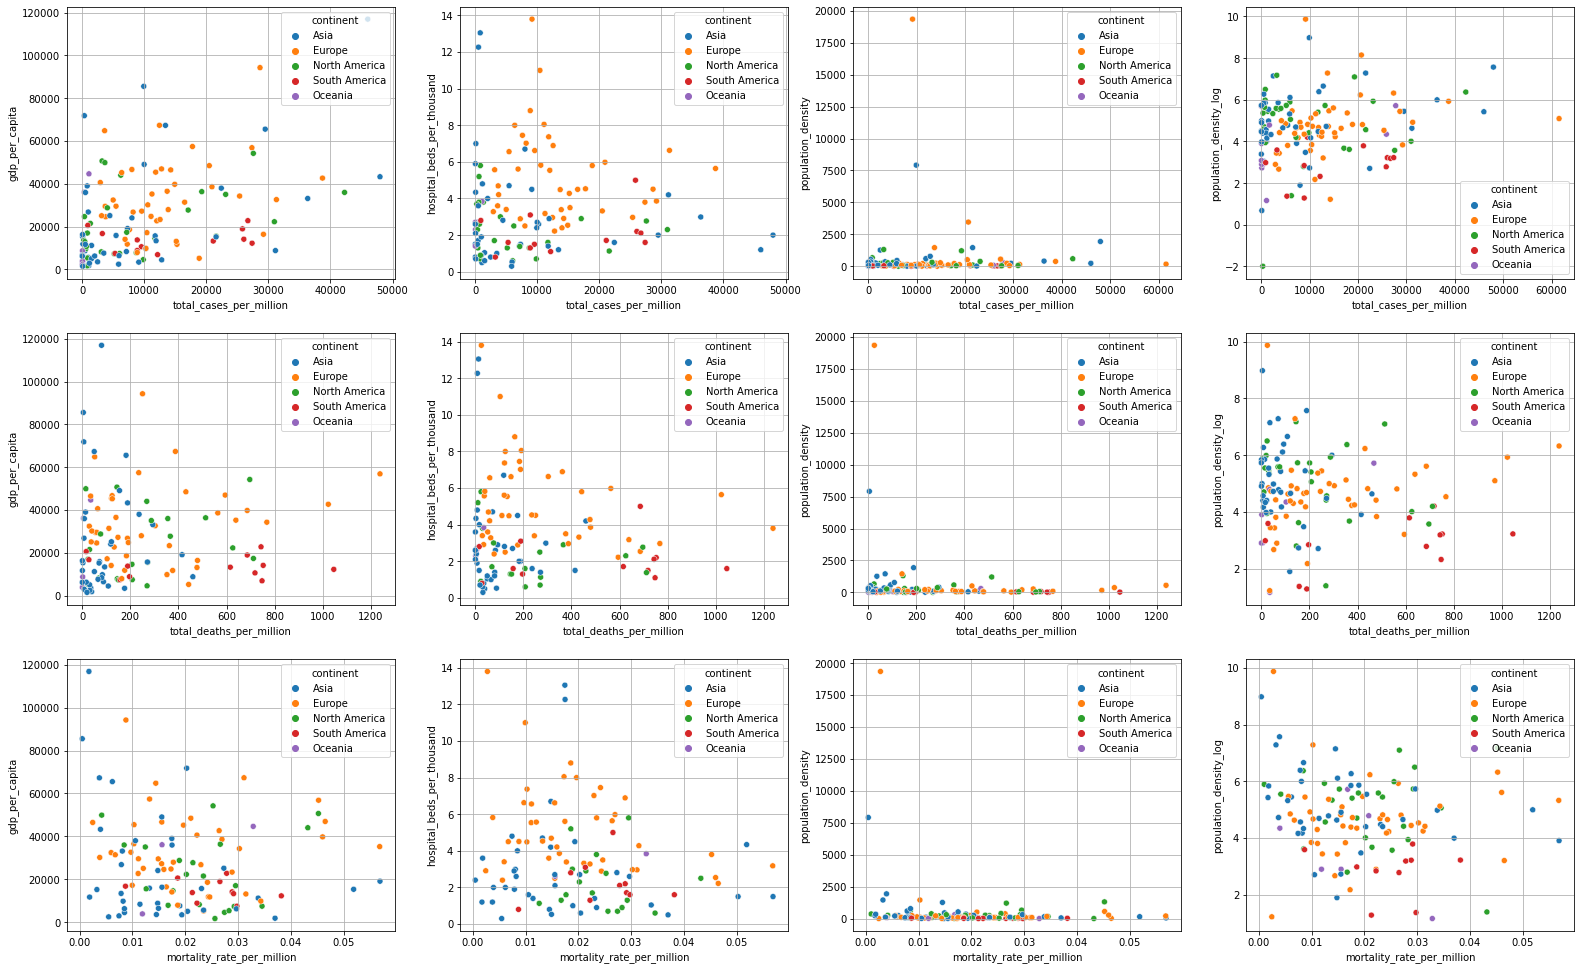

In [14]:
#Scatter plots for all countries except Africa

A_df = df_date.loc[df['continent'] != "Africa" ]  
scatter_plots(A_df)


In [15]:
#Pearson Correlation Coefficient for all continents except Africa
pearson_correlation_coefficient(A_df)


,gdp_per_capita,hospital_beds_per_thousand,population_density,population_density_log
total_cases_per_million,0.417221,0.009620,0.032944,0.172860
total_deaths_per_million,0.079068,-0.084022,-0.098931,-0.082928
mortality_rate_per_million,-0.145280,-0.181389,-0.185227,-0.187312


In [16]:
#P-values for all continents except Africa
#Groups with p-value under 0.05 are statistical significant
p_value(A_df)


,gdp_per_capita,hospital_beds_per_thousand,population_density,population_density_log
total_cases_per_million,0.000039,0.771314,0.576473,0.296317
total_deaths_per_million,0.288904,0.731776,0.328577,0.528131
mortality_rate_per_million,0.066445,0.179382,0.033924,0.102098


Based on the scatter plots, pearson correlation coefficients and p-values on 1-11-2020(D/M/Y) on all continents except Africa  we observe a decent positive correlation between total_cases_per_million and gdp_per_capita.
This is probably due to the fact that countries with high gdp_per_capita are doing more covid tests thus having more total_cases_per_million.

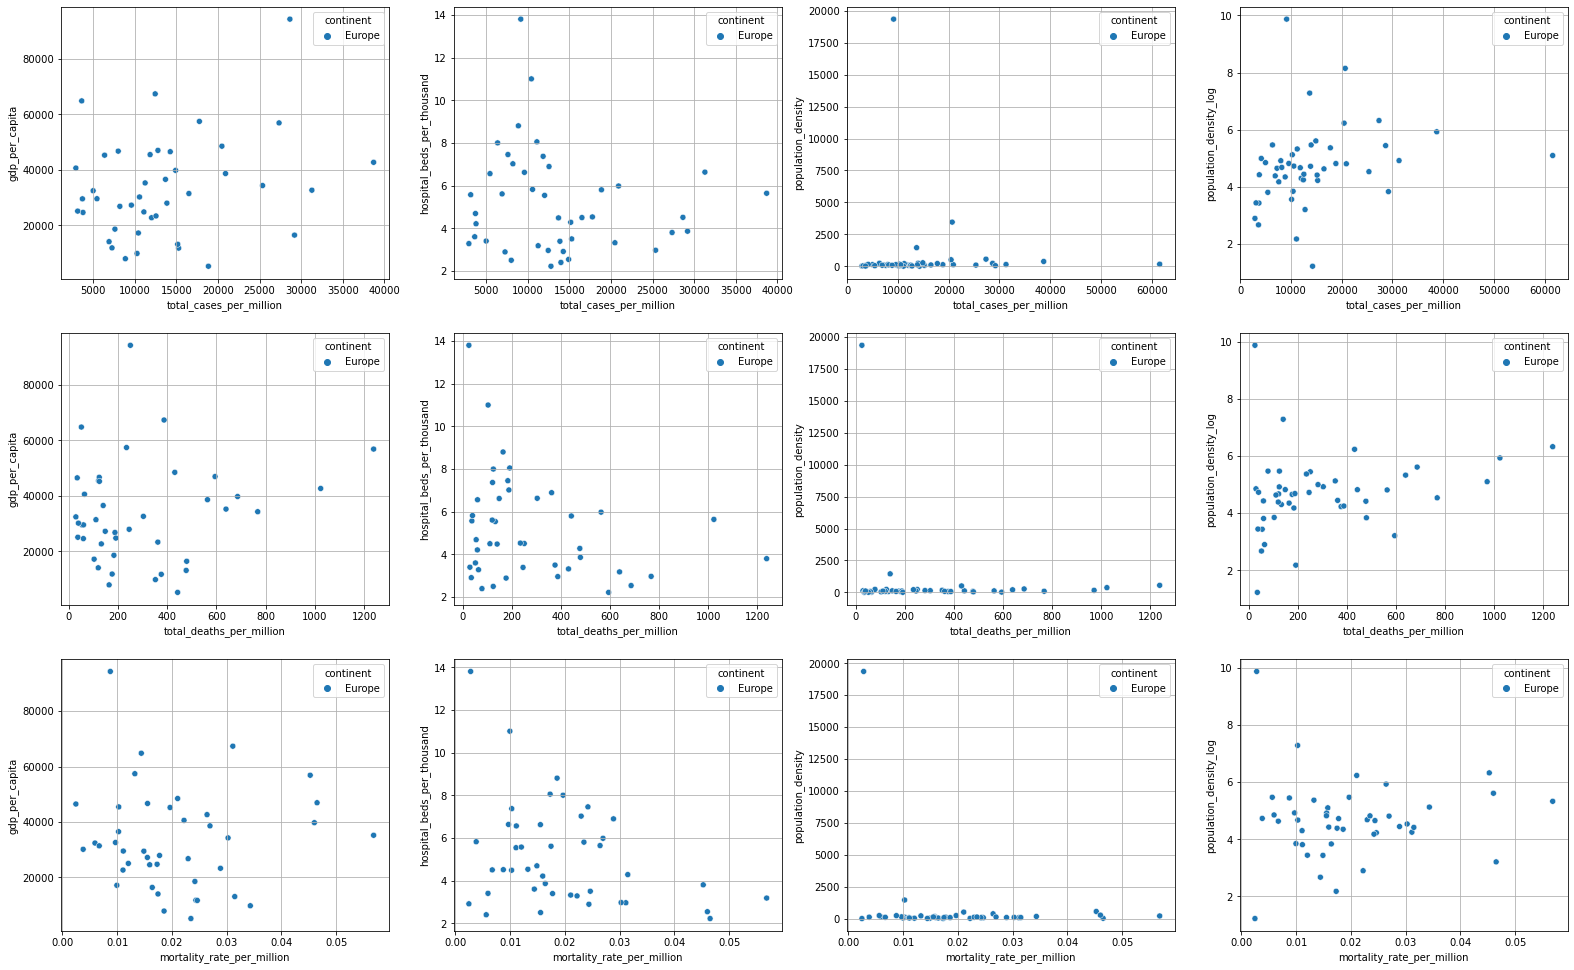

In [17]:
#Scatter plots for Europe
E_df = df_date.loc[df['continent'] == "Europe" ]
scatter_plots(E_df)


Based on the scatter plots we can see a negative correlation(contrast) between hospital_beds_per_thousand and (total_deaths_per_million, mortality_rate_per_million).

In [18]:
#Pearson Correlation Coefficient for Europe
pearson_correlation_coefficient(E_df)


,gdp_per_capita,hospital_beds_per_thousand,population_density,population_density_log
total_cases_per_million,0.256572,-0.130999,-0.039746,0.241842
total_deaths_per_million,0.150922,-0.275895,-0.125920,0.225579
mortality_rate_per_million,-0.008013,-0.339161,-0.207377,0.027099


In [19]:
#P-values for Europe 
#Groups with p-value under 0.05 are statistical significant
p_value(E_df)


,gdp_per_capita,hospital_beds_per_thousand,population_density,population_density_log
total_cases_per_million,0.115276,0.518284,0.094005,0.010153
total_deaths_per_million,0.313048,0.088871,0.128124,0.007502
mortality_rate_per_million,0.852708,0.040528,0.725089,0.168051


- Based on the scatter plots, pearson correlation coefficients and p-values on 1-11-2020(D/M/Y) in Europe we observe a slight negative correlation(contrast) between hospital_beds_per_thousand and mortality_rate_per_million. This is expected as higher number of hospital beds means better treatment and thus lower mortality rates.

- We can also observe a slight positive correlation between total_cases_per_million and population_density_log(population_density in log scale). As expected as higher population density contributes to higher transmissibility of covid19.

- We can also observe a slight positive correlation between total_deaths_per_million and population_density_log(population_density in log scale).


In [20]:
# B) 

def bar_plots(df):

    key_list = ["total_cases_per_million", "total_deaths_per_million", "mortality_rate_per_million"]
    continents_list = ["Europe", "Asia", "Oceania", "Africa", "North America", "South America"]

    fig = plt.figure(figsize=(30,10))
    fig.subplots_adjust(hspace=0.3, wspace=0.1)

    flag = 0
    for key in key_list:
        flag+=1
        ax = fig.add_subplot(1, 3, flag)
        sns.barplot(x = "continent", y = key , data = df, ax = ax, order = continents_list )
        plt.grid()

    plt.show()


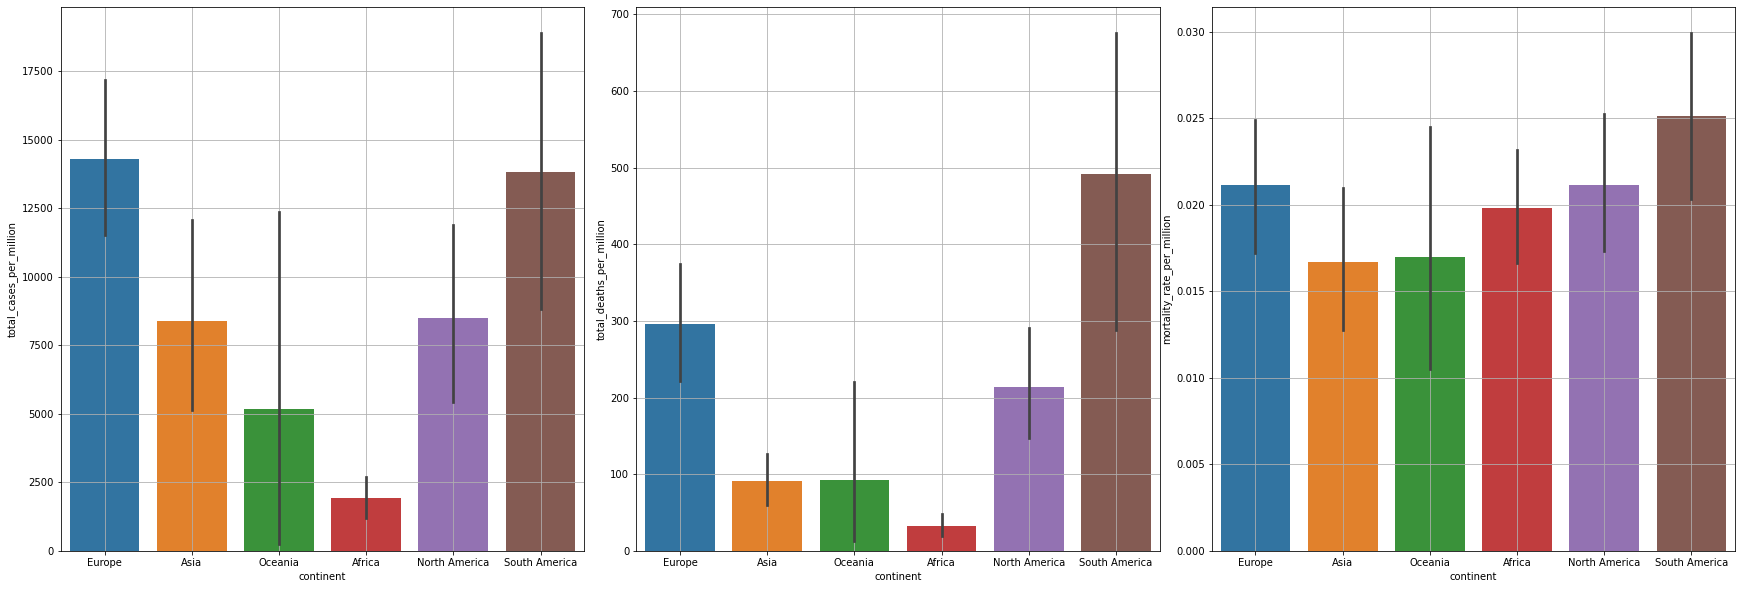

In [21]:
# Bar plots for all continents
bar_plots(df_date)


- Based on the bar plots on 1-11-2020(D/M/Y) we can see that Oceania has the biggest error bars(meaning variance or standard deviation) on all plots, meaning high variance between countries of this continent. Second to that is South America.

- We can also see that even though there is a big difference between continents on total_cases_per_million and total_deaths_per_million, the mortality rate is almost identical on all continents. This is expected as mortality rate is not correlated with total cases and total deaths which are correlated with the transmissibility of the virus.

In [22]:
def t_test(df):

    new_df = df[["total_cases_per_million", "total_deaths_per_million", "mortality_rate_per_million", "continent"]].dropna()

    seen_list = []
    key_list = ["total_cases_per_million", "total_deaths_per_million", "mortality_rate_per_million"]
    
    for key in key_list:
        continents_list = ["Europe", "Asia", "Oceania", "Africa", "North America", "South America"]
        seen_list = []
        print('Ttest for the attribute:', key, '\n')
        for continent_1 in continents_list:
            seen_list.append(continent_1)
            for continent_2 in continents_list:
                if continent_2 not in seen_list :
                    x = new_df[key][new_df['continent'] == continent_1]
                    y = new_df[key][new_df['continent'] == continent_2]
                    print(continent_1, '-', continent_2, ':', stats.ttest_ind(x,y,equal_var = False))

            print("\n")
                

In [23]:
#T-test for all continents
t_test(df_date)
#A large absolute T-test value tells us that the groups are significantly different
#A small absolute T-test value tells us that the groups are significantly similar

Ttest for the attribute: total_cases_per_million 

Europe - Asia : Ttest_indResult(statistic=1.7521831935796581, pvalue=0.08370050692664918)
Europe - Oceania : Ttest_indResult(statistic=0.807961799505068, pvalue=0.4507213743247866)
Europe - Africa : Ttest_indResult(statistic=7.357470095230642, pvalue=1.1444381217693788e-09)
Europe - North America : Ttest_indResult(statistic=1.237096554249904, pvalue=0.22137455679792511)
Europe - South America : Ttest_indResult(statistic=-0.35174391950069256, pvalue=0.7306575245580635)


Asia - Oceania : Ttest_indResult(statistic=0.03119018077873452, pvalue=0.976071591292322)
Asia - Africa : Ttest_indResult(statistic=3.730996924767584, pvalue=0.0005544393092717547)
Asia - North America : Ttest_indResult(statistic=-0.4234131095123151, pvalue=0.673478466008002)
Asia - South America : Ttest_indResult(statistic=-1.4501148816108227, pvalue=0.16688812063231673)


Oceania - Africa : Ttest_indResult(statistic=1.343660296768207, pvalue=0.23609260307227675)
Ocean

In [24]:
# C) 

def worldwide_line_plots(df):

    df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
    
    fig = plt.figure(figsize=(30,10))
    fig.subplots_adjust(hspace=0.3, wspace=0.2)

    attributes_list = ["new_cases","new_deaths","mortality_rate"]

    flag = 0
    for attribute in attributes_list:
        flag+=1
        ax = fig.add_subplot(2, 3, flag)
        sns.lineplot( x = "date", y = attribute, data = df, ax = ax)
        plt.grid()
    
    ax = fig.add_subplot(2, 3, 5)
    sns.lineplot( x = "date", y = "total_cases", data = df, ax = ax)
    plt.grid()

    plt.show()
    

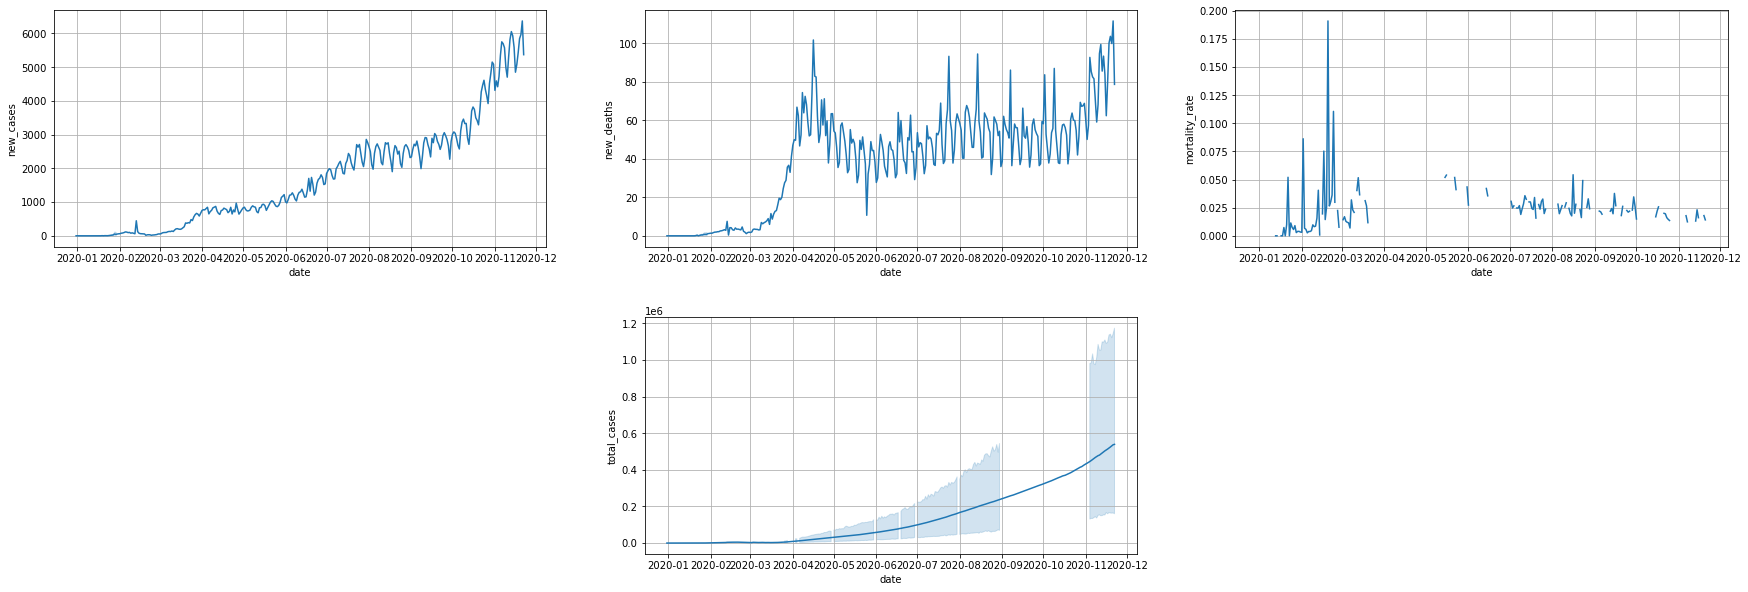

In [25]:
# Line plots worldwide
worldwide_line_plots(df)


- Firstly, we can see that the new cases increase steadily worlwide from the start of the pandemic and from October they seem to start increasing exponentially.

- Secondly, for new deaths we see they are pretty unstable with highs and lows all the time.

- Thirdly, for mortality rate we can see that it spiked in the beginning of the pandemic but soon decreased and stabilized in the lower tiers, due to better treatment and strict precautionary measures.

- Finaly, we can observe that indeed the total cases increased exponentially, as expected for such a highly contagious virus.

In [26]:
def regional_line_plots(df):

    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d') 

    fig = plt.figure(figsize=(30,10))
    fig.subplots_adjust(hspace=0.3, wspace=0.15)

    attributes_list = ["new_cases","new_deaths","mortality_rate"]

    flag = 0
    for attribute in attributes_list:
        flag+=1
        ax = fig.add_subplot(1, 3, flag)
        sns.lineplot( x = "date", y = attribute, hue = "continent",  data = df, ax = ax)
        plt.grid()

    plt.show()


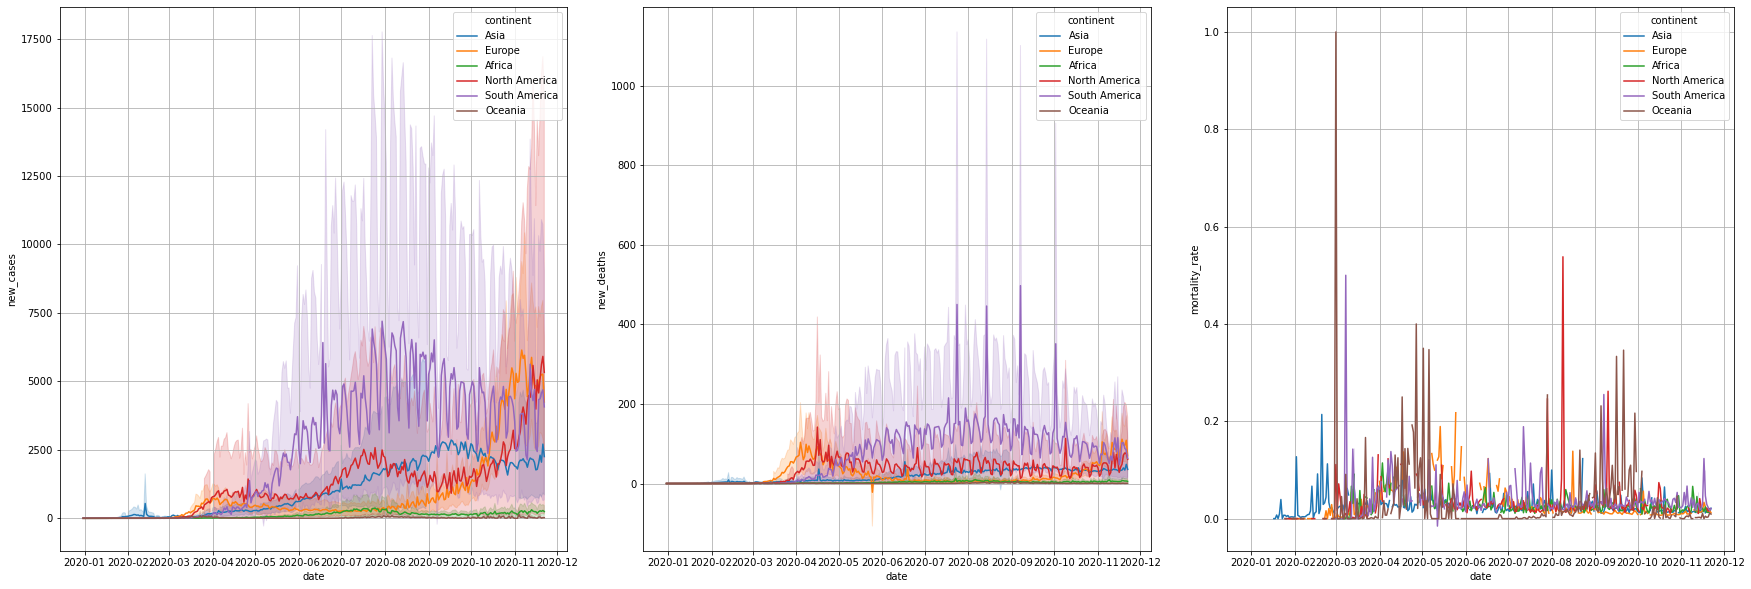

In [27]:
# Line plots for all continents
regional_line_plots(df)


**Asia:**

Steady increase in new cases and new deaths until 9-2020 then a small decrease and increase again.
Mortality rate steady with a small spike at the beginning of the pandemic, since its the origin place of covid19.

**Europe:**

New cases increased a little during March through May then stayed almost zero and from 9-2020 the are starting to increasing exponentially.
New deaths increased during March and April then stayed almost zero and from 9-2020 the are starting to increasing again.
This measurements are as expected since its the exact months most Europe cities underwent a lockdown.
Mortality rate is steady with small spikes sporadically.

**Africa:**

New cases and new deaths are almost zero for Africa from the beginning of the pandemic until now.
This is probably due to low number of covid tests and poor medical care.

**North America:**

New cases rise a little during March-April then rise higher during Summer months and from October are starting to increasing exponentially.
New deaths increased during March and April then decreased but flactuate frequently.
Mortality rate is steady with a huge spike on August.

**South America:**

South Americas new cases and new deaths rised rapidly from may then peaked during August and september and are starting to decreasing from then on but with high fluctuations.
This was expected because most viruses(inluding covid19) are way more contagious during winter months which for south hemisphere countries to be opposite to our winter months. 
Mortality rate is steady but with huge spike during March and a smaller in July.

**Oceania:**

New cases and new deaths are almost zero for Oceania from the beginning of the pandemic until now and the spikes in mortality rate are probably individual cases.
This is probably due to a strict lockdown plus the fact that they are pretty isolated continent.

In [39]:
# D) 

df_usa = pd.read_csv('united_states_covid19_cases_and_deaths_by_state.csv',skiprows=3)

df_voting = pd.read_excel('state-voting.xlsx', engine="openpyxl")
df_voting.to_csv('state-voting.csv', encoding='utf-8', index=False)  # converting the xlsx file to csv type
df_voting = df_voting.rename(columns={'State': 'State/Territory'})   # renaming the State to "State/Territory" so we can join the 2 data frames

# adding the values of New York City to New York (State)
for column in df_usa.columns:        
    if column != "State/Territory" :
        df_usa.at[38, column] += df_usa.at[39, column]
        

In [40]:
def usa_analysis(df_usa,df_voting):

    df_usa_new = df_usa.merge(df_voting, on = ["State/Territory"], how = 'outer')  # outer join between df_usa and df_voting

    df_mort_col = df_usa_new['Total Deaths']/df_usa_new['Total Cases']  
    df_usa_new.insert(15, 'Mortality Rate', df_mort_col)               # adding a new column to the data frame indicating the Mortality Rare for each State

    attributes_list = ["Total Cases","Total Deaths","Mortality Rate"]

    fig = plt.figure(figsize=(20,18))
    fig.subplots_adjust(hspace=0.3, wspace=0.2)

    flag = 0
    for attribute in attributes_list:
        flag+=1
        ax = fig.add_subplot(3, 1, flag)
        sns.barplot( x = "Abbreviation", y = attribute, hue = 'Vote',  data = df_usa_new, ax  = ax)
        plt.grid()
        plt.xlabel("States")
    
    plt.show()


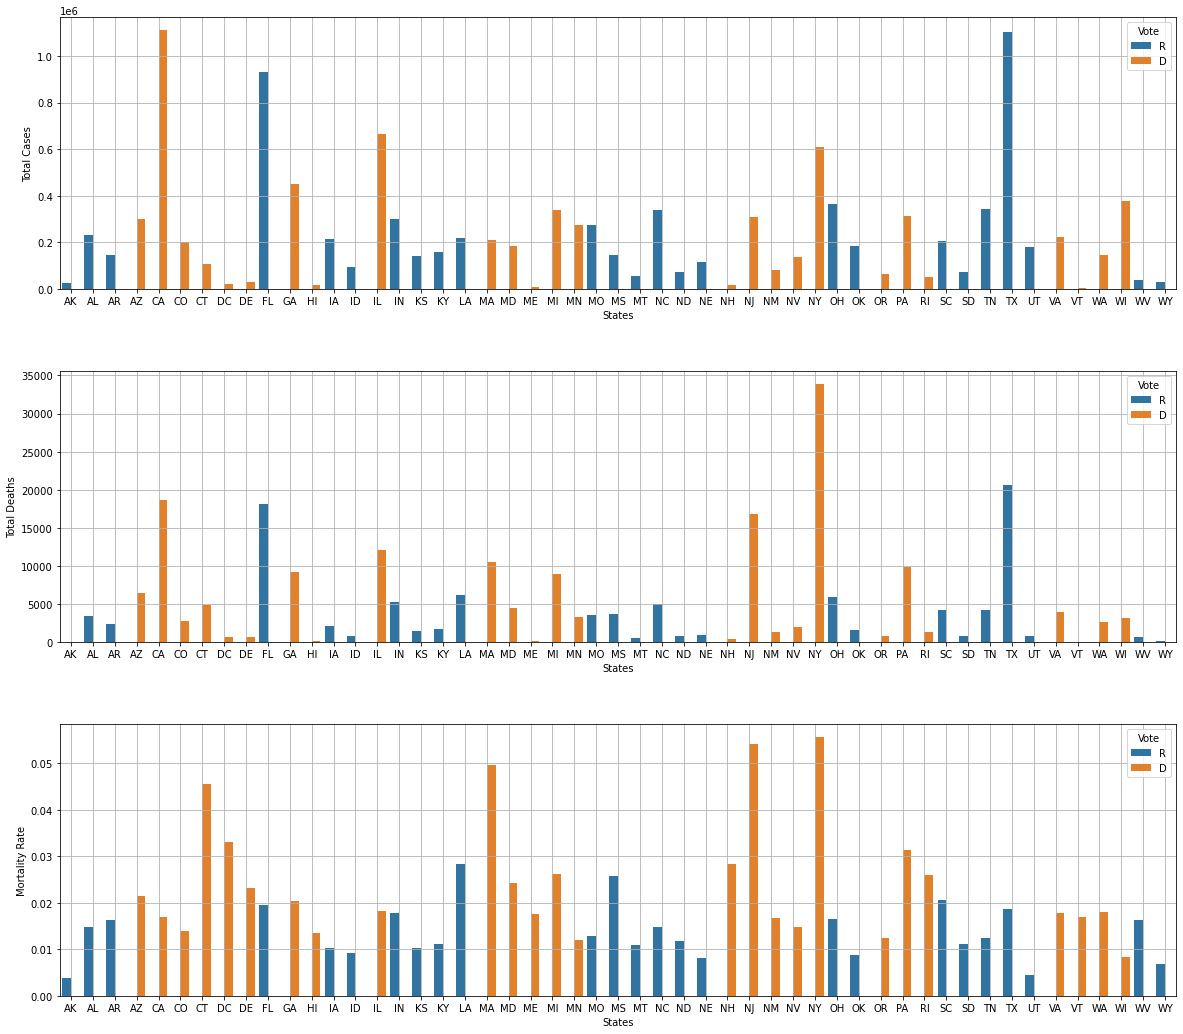

In [41]:
#Analysis of pandemic stats based on USA elections results
usa_analysis(df_usa,df_voting)


Based on the barplots above we see that the states with mortality rates way higher than the USA average voted for the opposition party(Democratic party), probably showing their dissatisfaction with the republican partys counter measures for covid19.
